In [1]:
import numpy as np
import pandas as pd
from generate_data import generate_data

DATA_DIM = 20
ALPHA_DIM = 5
LAMBDA = .8

## Take a look at data

In [2]:
X, y = generate_data(5000, ratio=(.2, .5), dist='norm', ndim=DATA_DIM)
train_X, valid_X, test_X = X
train_y, valid_y, test_y = y
N_TRAIN, N_VALID, N_TEST = len(train_X), len(valid_X), len(test_X)

print(f'Data size in train/valid/test: {len(train_X)}/{len(valid_X)}/{len(test_X)}')
pd.DataFrame(train_X[:5], columns=[f'feat_{i}' for i in range(DATA_DIM)])

Data size in train/valid/test: 2000/500/2500


,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,feat_11,feat_12,feat_13,feat_14,feat_15,feat_16,feat_17,feat_18,feat_19
0,1.007528,2.212885,0.913228,2.248878,-2.134387,-0.755443,-1.387430,-3.747466,-5.299789,-0.571823,-0.952496,-9.042215,1.902944,-6.769699,7.714822,-3.120846,2.132086,5.900416,-1.580574,2.518132
1,-12.214595,-8.934541,-0.017637,-4.188702,0.492142,0.603420,-2.985120,6.517770,4.411903,-5.649558,-1.080564,3.357630,2.738303,7.468580,3.001543,-2.798315,0.213145,0.048923,11.106905,-2.434489
2,2.642638,2.675849,-1.242832,2.896768,-4.688998,0.789526,-5.258424,10.689244,-6.718992,3.157044,7.480542,3.393825,-9.255019,-6.989534,6.635025,13.982953,6.891894,-2.151276,0.580057,1.981959
3,0.405286,-0.533519,-1.478763,0.758337,-4.266940,6.567069,2.608212,3.439802,1.914154,2.210823,4.133154,-0.740866,11.144614,-2.730599,3.376890,-7.134892,2.048595,4.434387,-9.028349,-5.433581
4,5.610526,-4.650380,-1.269253,1.439595,-0.733069,3.568383,-1.257333,6.263507,2.606145,-2.790929,-3.887665,7.086630,-1.468139,-3.320200,5.157155,-12.106528,-1.430247,-3.174402,0.093742,-1.385007


In [3]:
from sklearn.decomposition import PCA
import matplotlib.pylab as plt
import seaborn as sns
colors = sns.color_palette()

pca = PCA(n_components=2)
pca.fit(np.concatenate(X))
red_train_X = pca.transform(train_X)
red_valid_X = pca.transform(valid_X)
red_test_X = pca.transform(test_X)

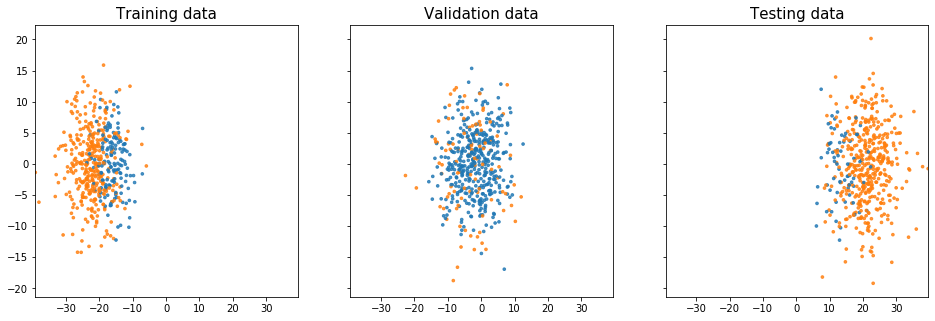

In [4]:
max_show = 500

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 5), sharey=True)
x_scale = (min(np.concatenate([red_train_X[:max_show, 0], red_test_X[-max_show:, 0]])), 
           max(np.concatenate([red_train_X[:max_show, 0], red_test_X[-max_show:, 0]])))

ax1.scatter(red_train_X[:max_show, 0], red_train_X[:max_show, 1], 
            color=[colors[y] for y in train_y[:max_show]], s=7, alpha=.8)
ax1.set_xlim(x_scale)
ax1.set_title('Training data', fontsize=15)
ax2.scatter(red_valid_X[:max_show, 0], red_valid_X[:max_show, 1], color=[colors[y] for y in valid_y[:max_show]], 
            s=7, alpha=.8)
ax2.set_xlim(x_scale)
ax2.set_title('Validation data', fontsize=15)
ax3.scatter(red_test_X[-max_show:, 0], red_test_X[-max_show:, 1], color=[colors[y] for y in test_y[-max_show:]], 
            s=7, alpha=.8)
ax3.set_xlim(x_scale)
ax3.set_title('Testing data', fontsize=15)
plt.show()

## Just lightgbm

In [5]:
import warnings
from tqdm import tqdm, tqdm_notebook
warnings.filterwarnings('ignore')

import lightgbm as lgb

In [6]:
from sklearn.metrics import roc_curve, auc

def plot_roc(model, X, y):
    y_ = model.predict(X)
    fpr, tpr, _ = roc_curve(y, y_, pos_label=1)

    plt.figure(figsize=(6,5))
    plt.plot(fpr, tpr, linewidth=3, color=colors[0])
    plt.plot(np.linspace(0, 1, 20), np.linspace(0, 1, 20), linewidth=1, 
             color=colors[3], linestyle='--')
    plt.title('ROC curve on Testing data', fontsize=15)
    plt.xlabel('FPR', fontsize=11)
    plt.ylabel('TPR', fontsize=11)
    plt.text(0, .95, f'AUC: {auc(fpr, tpr):.4f}', fontsize=11)

    plt.show()

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.95866	valid_1's auc: 0.769393
[200]	training's auc: 0.974736	valid_1's auc: 0.791108
[300]	training's auc: 0.980649	valid_1's auc: 0.803711
[400]	training's auc: 0.983847	valid_1's auc: 0.807315
[500]	training's auc: 0.985958	valid_1's auc: 0.806833
[600]	training's auc: 0.987828	valid_1's auc: 0.811301
[700]	training's auc: 0.989945	valid_1's auc: 0.818129
[800]	training's auc: 0.991556	valid_1's auc: 0.824094
[900]	training's auc: 0.993206	valid_1's auc: 0.830947
[1000]	training's auc: 0.994299	valid_1's auc: 0.838435
Did not meet early stopping. Best iteration is:
[1000]	training's auc: 0.994299	valid_1's auc: 0.838435


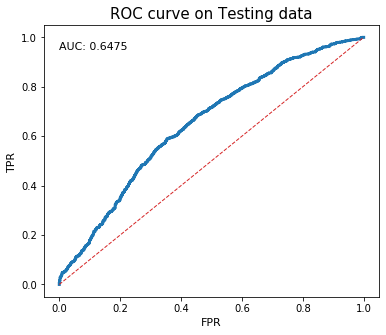

In [7]:
LGBM_ROUND = 1000
VERBOSE_ROUND = 100

params = {
          'objective': 'binary',
          'metrics': 'auc',
          'learning_rate': 0.01,
          'num_threads': -1,
          'feature_fraction': .66,
          'max_depth': 4,
          'min_data_in_leaf': 2**5,
          'num_leaves': 2**5,
          'is_unbalace': True,
         }

dtrain, dvalid = lgb.Dataset(train_X, train_y), lgb.Dataset(valid_X, valid_y)
clr = lgb.train(params, train_set=dtrain, num_boost_round=LGBM_ROUND, 
                valid_sets=[dtrain, dvalid], early_stopping_rounds=100, verbose_eval=VERBOSE_ROUND)

plot_roc(clr, test_X, test_y)

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.945931	valid_1's auc: 0.768125
[200]	training's auc: 0.973324	valid_1's auc: 0.79
[300]	training's auc: 0.986941	valid_1's auc: 0.8075
[400]	training's auc: 0.993311	valid_1's auc: 0.82625
[500]	training's auc: 0.996974	valid_1's auc: 0.83125
Early stopping, best iteration is:
[486]	training's auc: 0.996656	valid_1's auc: 0.8325


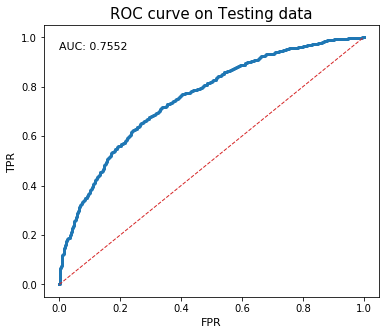

In [8]:
# Use validation set to Train with no earlystop
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
train_idx, valid_idx = next(sss.split(valid_X, valid_y))
dtrain = lgb.Dataset(valid_X[train_idx], valid_y[train_idx])
dvalid = lgb.Dataset(valid_X[valid_idx], valid_y[valid_idx])

clr = lgb.train(params, train_set=dtrain, num_boost_round=LGBM_ROUND, 
                valid_sets=[dtrain, dvalid], early_stopping_rounds=100, verbose_eval=VERBOSE_ROUND)

plot_roc(clr, test_X, test_y)

## Lightgbm with MOEW

In [9]:
import torch
from torch import nn
from target_autoencoder import TargetAutoEncoder, FocalLoss, weights_init


LR = .01
N_EPOCH = 100
N_BATCH = 128

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [10]:
train_X, valid_X, train_y, valid_y = map(lambda x: torch.tensor(x, dtype=torch.float64).to(device), 
                                       (train_X, valid_X, train_y, valid_y))

In [11]:
encoder = TargetAutoEncoder(input_dim=DATA_DIM, alpha_size=ALPHA_DIM).double().to(device)
encoder.apply(weights_init)
optimizer = torch.optim.Adam(encoder.parameters(), lr=LR, weight_decay=1e-3)
criterion_x = nn.MSELoss()
criterion_y = FocalLoss()

In [12]:
hist_x, hist_y = [], []
norm_train_X = (train_X-train_X.mean()) / train_X.std()

for epoch in tqdm_notebook(range(N_EPOCH), desc='Train AutoEncoder'):
    for i in range(N_TRAIN//N_BATCH + 1):
        start_idx, end_idx = i*N_BATCH, (i+1)*N_BATCH
        
        encoder.train()
        batch_X, batch_y = norm_train_X[start_idx:end_idx], train_y[start_idx:end_idx]
        batch_y.unsqueeze_(dim=-1)
        batch_Xy = torch.cat((batch_X, batch_y), dim=1)
        pred_X, pred_y, _ = encoder(batch_Xy)
        loss_x = criterion_x(pred_X, batch_X)
        loss_y = criterion_y(pred_y, batch_y.squeeze())
        loss = LAMBDA*loss_x + (1-LAMBDA)*loss_y

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    hist_x.append(loss_x.item())
    hist_y.append(loss_y.item())

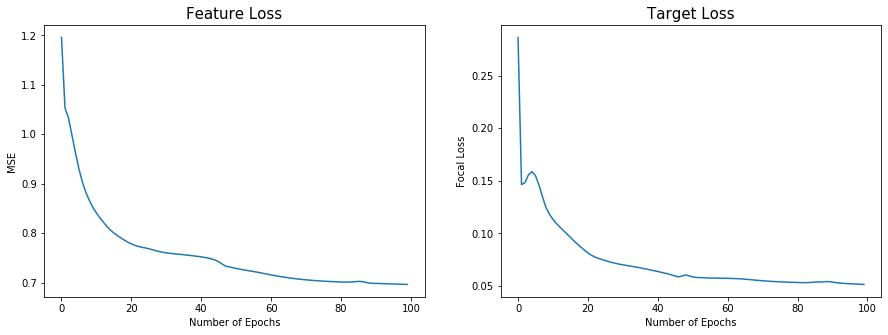

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(hist_x)
ax1.set_title('Feature Loss', fontsize=15)
ax1.set(xlabel='Number of Epochs', ylabel='MSE')
ax2.plot(hist_y)
ax2.set_title('Target Loss', fontsize=15)
ax2.set(xlabel='Number of Epochs', ylabel='Focal Loss')
plt.show()

In [14]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from utils import sample_from_ball, tensor_to_numpy, tensor_to_dmatrix, imp_sampling, get_weight


RADIUS = 2
NUM_ALPHA_BATCHES = 100
NUM_PARALLEL_ALPHAS = 1 #TODO
params['is_unbalace'] = False

validation_metrics = []
sample_validation_metrics = []
alphas = np.zeros(shape=(0, ALPHA_DIM))
kernel = RBF(length_scale=RADIUS, length_scale_bounds=(RADIUS*1e-3, RADIUS*1e3))*ConstantKernel(1.0, (1e-3, 1e3))


encoder.eval()
train_Xy = torch.cat((norm_train_X, train_y.unsqueeze(dim=-1)), dim=1)
_, _, embedding = encoder(train_Xy)
embedding = tensor_to_numpy(embedding)
pi = imp_sampling(tensor_to_numpy(train_y), tensor_to_numpy(valid_y))

for idx in tqdm_notebook(range(NUM_ALPHA_BATCHES), desc='Alpha iteration'):
    if idx == 0:
        # Initial alpha by sampling from a ball
        alpha_batch = sample_from_ball(NUM_PARALLEL_ALPHAS, ALPHA_DIM, RADIUS)
    else:
        # Use UCB to generate candidates
        alpha_batch = np.zeros(shape=(0, ALPHA_DIM))
        sample_alphas = np.copy(alphas)
        sample_valid_metrics = [m[0] for m in validation_metrics]
        candidates = sample_from_ball(1000, ALPHA_DIM, RADIUS)
        for _ in range(NUM_PARALLEL_ALPHAS):
            gp = GaussianProcessRegressor(kernel=kernel, alpha=.1)
            gp.fit(sample_alphas, sample_valid_metrics)
            
            metric_mles, metric_stds = gp.predict(candidates, return_std=True)
            metric_lcbs = metric_mles - 1.0*metric_stds
            
            best_idx = np.argmin(metric_lcbs)
            best_alpha = np.expand_dims(candidates[best_idx], axis=0)
            best_alpha_metric_ucb = metric_mles[best_idx] + 1.0*metric_stds[best_idx]
            
            # Add candidate to the GP, assuming the metric observation is the LCB.
            alpha_batch = np.concatenate((alpha_batch, best_alpha))
            sample_alphas = np.concatenate((sample_alphas, best_alpha))
            sample_validation_metrics.append(best_alpha_metric_ucb)
    
    # Assign example weights to each data then train LGBM
    weight = get_weight(embedding, alpha_batch, tensor_to_numpy(train_y), pi)
    weight = np.squeeze(weight)
    dtrain, dvalid = tensor_to_dmatrix(train_X, train_y, w=weight), tensor_to_dmatrix(valid_X, valid_y)
    clr = lgb.train(params, train_set=dtrain, num_boost_round=LGBM_ROUND//2, 
                    valid_sets=[dtrain, dvalid], early_stopping_rounds=100, verbose_eval=False)
    
    # Append alpha and metrics
    alphas = np.concatenate([alphas, alpha_batch])
    parallel_validation_metrics = [[clr.best_score['valid_1']['auc']]]
    validation_metrics.extend(parallel_validation_metrics)

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.935538	valid_1's auc: 0.793304
[200]	training's auc: 0.967099	valid_1's auc: 0.816453
[300]	training's auc: 0.979884	valid_1's auc: 0.831696
[400]	training's auc: 0.986033	valid_1's auc: 0.849122
[500]	training's auc: 0.988696	valid_1's auc: 0.856407
[600]	training's auc: 0.991026	valid_1's auc: 0.860189
[700]	training's auc: 0.992821	valid_1's auc: 0.8626
[800]	training's auc: 0.994287	valid_1's auc: 0.866966
[900]	training's auc: 0.995719	valid_1's auc: 0.86986
[1000]	training's auc: 0.996571	valid_1's auc: 0.873414
Did not meet early stopping. Best iteration is:
[998]	training's auc: 0.996571	valid_1's auc: 0.873312


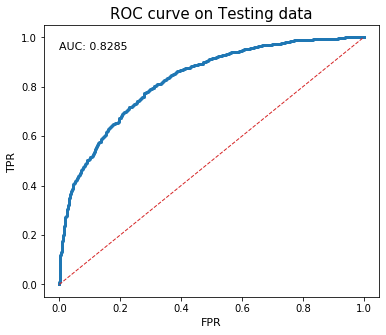

In [15]:
best_alpha = alphas[np.argmax(validation_metrics)][np.newaxis, :]
weight = get_weight(embedding, best_alpha, tensor_to_numpy(train_y), pi)
weight = np.squeeze(weight)
dtrain, dvalid = tensor_to_dmatrix(train_X, train_y, w=weight), tensor_to_dmatrix(valid_X, valid_y)
clr = lgb.train(params, train_set=dtrain, num_boost_round=LGBM_ROUND, 
                valid_sets=[dtrain, dvalid], early_stopping_rounds=100, verbose_eval=VERBOSE_ROUND)

plot_roc(clr, test_X, test_y)

In [16]:
tvalid_X, tvalid_y = valid_X[train_idx], valid_y[train_idx]
vvalid_X, vvalid_y = valid_X[valid_idx], valid_y[valid_idx]
norm_tvalid_X = (tvalid_X-tvalid_X.mean()) / tvalid_X.std()


n_tvalid = tvalid_X.shape[0]

encoder = TargetAutoEncoder(input_dim=DATA_DIM, alpha_size=ALPHA_DIM).double().to(device)
encoder.apply(weights_init)
optimizer = torch.optim.Adam(encoder.parameters(), lr=LR, weight_decay=1e-3)
criterion_x = nn.MSELoss()
criterion_y = FocalLoss()

for epoch in tqdm_notebook(range(N_EPOCH), desc='Train AutoEncoder'):
    for i in range(n_tvalid//N_BATCH + 1):
        start_idx, end_idx = i*N_BATCH, (i+1)*N_BATCH
        
        encoder.train()
        batch_X, batch_y = norm_tvalid_X[start_idx:end_idx], tvalid_y[start_idx:end_idx]
        batch_y.unsqueeze_(dim=-1)
        batch_Xy = torch.cat((batch_X, batch_y), dim=1)
        pred_X, pred_y, _ = encoder(batch_Xy)
        
        loss_x = criterion_x(pred_X, batch_X)
        loss_y = criterion_y(pred_y, batch_y.squeeze())
        loss = LAMBDA*loss_x + (1-LAMBDA)*loss_y
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

In [17]:
validation_metrics = []
sample_validation_metrics = []
alphas = np.zeros(shape=(0, ALPHA_DIM))
kernel = RBF(length_scale=RADIUS, length_scale_bounds=(RADIUS*1e-3, RADIUS*1e3))*ConstantKernel(1.0, (1e-3, 1e3))


encoder.eval()
train_Xy = torch.cat((norm_tvalid_X, tvalid_y.unsqueeze(dim=-1)), dim=1)
_, _, embedding = encoder(train_Xy)
embedding = tensor_to_numpy(embedding)
pi = imp_sampling(tensor_to_numpy(train_y), tensor_to_numpy(valid_y))

for idx in tqdm_notebook(range(NUM_ALPHA_BATCHES), desc='Alpha iteration'):
    if idx == 0:
        # Initial alpha by sampling from a ball
        alpha_batch = sample_from_ball(NUM_PARALLEL_ALPHAS, ALPHA_DIM, RADIUS)
    else:
        # Use UCB to generate candidates
        alpha_batch = np.zeros(shape=(0, ALPHA_DIM))
        sample_alphas = np.copy(alphas)
        sample_valid_metrics = [m[0] for m in validation_metrics]
        candidates = sample_from_ball(1000, ALPHA_DIM, RADIUS)
        for _ in range(NUM_PARALLEL_ALPHAS):
            gp = GaussianProcessRegressor(kernel=kernel, alpha=.1)
            gp.fit(sample_alphas, sample_valid_metrics)
            
            metric_mles, metric_stds = gp.predict(candidates, return_std=True)
            metric_lcbs = metric_mles - 1.0*metric_stds
            
            best_idx = np.argmin(metric_lcbs)
            best_alpha = np.expand_dims(candidates[best_idx], axis=0)
            best_alpha_metric_ucb = metric_mles[best_idx] + 1.0*metric_stds[best_idx]
            
            # Add candidate to the GP, assuming the metric observation is the LCB.
            alpha_batch = np.concatenate((alpha_batch, best_alpha))
            sample_alphas = np.concatenate((sample_alphas, best_alpha))
            sample_validation_metrics.append(best_alpha_metric_ucb)
    
    # Assign example weights to each data then train LGBM
    weight = get_weight(embedding, alpha_batch, tensor_to_numpy(tvalid_y), pi)
    weight = np.squeeze(weight)
    dtrain, dvalid = tensor_to_dmatrix(tvalid_X, tvalid_y, w=weight), tensor_to_dmatrix(vvalid_X, vvalid_y)
    clr = lgb.train(params, train_set=dtrain, num_boost_round=LGBM_ROUND//2, 
                    valid_sets=[dtrain, dvalid], early_stopping_rounds=100, verbose_eval=False)
    
    # Append alpha and metrics
    alphas = np.concatenate([alphas, alpha_batch])
    parallel_validation_metrics = [[clr.best_score['valid_1']['auc']]]
    validation_metrics.extend(parallel_validation_metrics)

Training until validation scores don't improve for 100 rounds.
[100]	training's auc: 0.976091	valid_1's auc: 0.816875
[200]	training's auc: 0.987868	valid_1's auc: 0.84375
[300]	training's auc: 0.993705	valid_1's auc: 0.843125
Early stopping, best iteration is:
[237]	training's auc: 0.99102	valid_1's auc: 0.860625


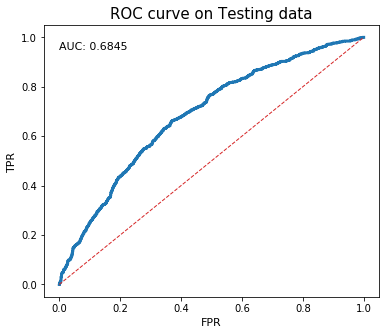

In [18]:
best_alpha = alphas[np.argmax(validation_metrics)][np.newaxis, :]
weight = get_weight(embedding, best_alpha, tensor_to_numpy(tvalid_y), pi)
weight = np.squeeze(weight)
dtrain, dvalid = tensor_to_dmatrix(tvalid_X, tvalid_y, w=weight), tensor_to_dmatrix(vvalid_X, vvalid_y)
clr = lgb.train(params, train_set=dtrain, num_boost_round=LGBM_ROUND, 
                valid_sets=[dtrain, dvalid], early_stopping_rounds=100, verbose_eval=VERBOSE_ROUND)

plot_roc(clr, test_X, test_y)